In [2]:
%cd ..

c:\Users\shuduo\Documents\GitHub\python__optical-bubble-identification


In [4]:
import numpy as np 
from bubbleDetection.dataset import load_image
from bubbleDetection.transform import * 
import matplotlib.pyplot as plt 
from PIL import Image
import cv2

c:\Users\shuduo\miniconda3\envs\pytorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### K-means图像分割
K-means图像聚类的原理为统计所有的像素点，将所有的像素点聚类到K个中心。
图像上颜色越接近的像素点越容易被聚类到统一区域。
对于气泡分割的应用场景是不适用的。

Text(0.5, 1.0, 'K=3')

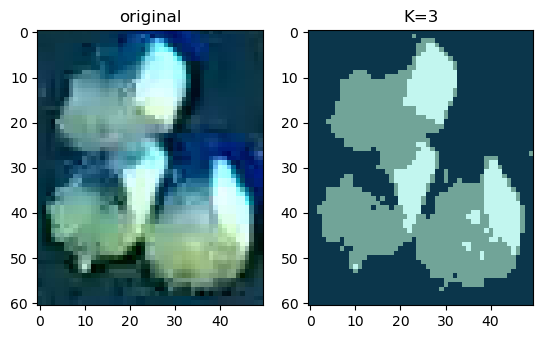

In [11]:
original_img = cv2.imread('test.png') 
img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB) 
fig, ax = plt.subplots(1, 2) 
ax[0].imshow(img)
ax[0].set_title("original")
vectorized = np.float32(img.reshape((-1, 3)))

# perform k-means
K = 3
attempts=10
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS) 

# display results 
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
ax[1].imshow(result_image) 
ax[1].set_title("K=3")